In [58]:
from generate_lib import *

In [59]:
SHOW_PLOTS = True
SAVE_PLOTS = True

In [60]:
data = list()

systems = data_files[0:20]

for file in systems:
    p = os.path.join(path, file)

    print('Appending data from {file}...'.format(file = file.replace('.csv', '')))

    d = get_data(p, skip_failed_systems = True)

    if d != None:
        print('Append successful!')

        data.append(d)
    else:
        print('Append failed.')

Appending data from sysSim_0...
Append failed.
Appending data from sysSim_0_randomO...
Append successful!
Appending data from sysSim_1...
Append successful!
Appending data from sysSim_1_randomO...
Append successful!
Appending data from sysSim_2...
Append failed.
Appending data from sysSim_2_randomO...
Append failed.
Appending data from sysSim_3...
Append failed.
Appending data from sysSim_3_randomO...
Append successful!
Appending data from sysSim_4...
Append successful!
Appending data from sysSim_4_randomO...
Append successful!
Appending data from sysSim_5...
Append successful!
Appending data from sysSim_5_randomO...
Append successful!
Appending data from sysSim_6...
Append successful!
Appending data from sysSim_6_randomO...
Append successful!
Appending data from sysSim_7...
Append successful!
Appending data from sysSim_7_randomO...
Append successful!
Appending data from sysSim_8...
Append successful!
Appending data from sysSim_8_randomO...
Append successful!
Appending data from sysSim

In [61]:
sums = dict()

for d in data:
    key = d['max_planets']
    value = d['axes']['y']

    if key not in sums:
        print('new key: ' + str(key))

        sums[key] = value
    else:
        sums[key] += value

new key: 9
new key: 3
new key: 4


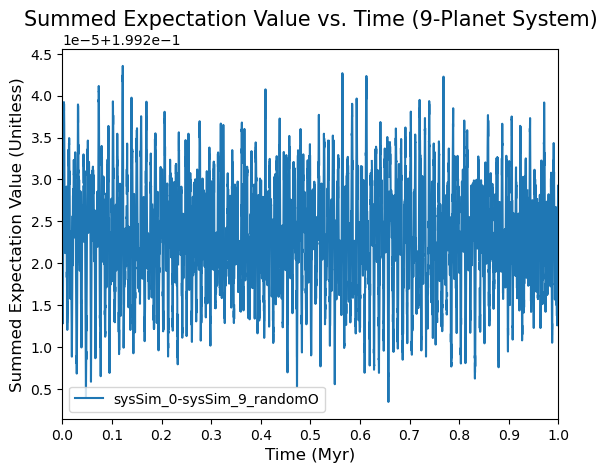

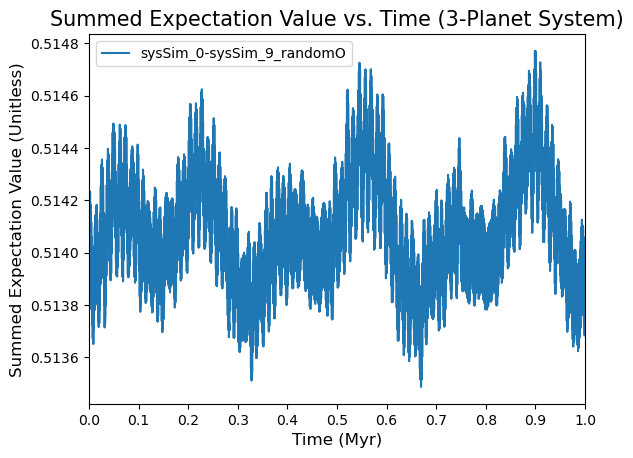

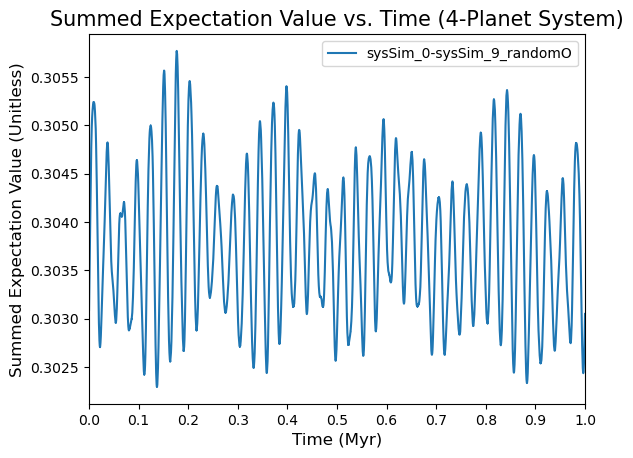

In [62]:
for key in sums:
    (fig, ax) = plt.subplots()

    (x, y) = (data[0]['axes']['x'], sums[key])

    label = '{f1}-{f2}'.format(f1 = systems[0].replace('.csv', ''), f2 = systems[-1].replace('.csv', ''))
    
    plt.plot(x, y, label = label)

    ax.set_title('Summed Expectation Value vs. Time ({n}-Planet System)'.format(n=key), fontsize = 15)
    ax.set_xlabel('Time (Myr)', fontsize = 12)
    ax.set_ylabel('Summed Expectation Value (Unitless)', fontsize = 12)

    xmin = np.nanmin(x)
    xmax = np.nanmax(x)

    ax.set_xlim(xmin, xmax)

    ax.xaxis.set_major_locator(tck.LinearLocator(11))
    ax.xaxis.set_major_formatter(tck.FuncFormatter(lambda x, pos: '%.1f' % (x/1e6)))

    plt.legend()

    if SAVE_PLOTS:
        save_path = os.path.join(os.pardir, 'results', 'sum-exp-values', 'sum-exp-values-{n}-planets'.format(n = key))
        fig.savefig(save_path, dpi = 300)

    if SHOW_PLOTS:
        plt.show()